In [1]:
import sys
sys.path.append('/Users/sid/Desktop/DL-L8S2-UV-main')
import rasterio
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from dl_l8s2_uv import utils
from dl_l8s2_uv.satreaders import l8image, s2image

In [2]:
# Tweaks. Recommmended Tensorflow >=2.1 with a CUDA GPU (if available)
utils.select_cuda_device("gpu")

In [3]:
RGB_BANDS = {"L8": [4, 3, 2], "S2": [3, 2, 1]}

# Options: 
# FCNN input bands 
namemodels = ["rgbi", "rgbiswir"]
# Satellite image
satnames = ["L8", "S2"]

### LANDSAT-8

In [4]:
satname = "L8"
namemodel = "rgbiswir"

In [5]:
# Read image
# landsatimage = "C:../../prods/LC08_L1TP_002053_20160520_20170324_01_T1"
# landsatimage = "/Users/sid/Desktop/LC08_L2SP_160043_20140227_20200911_02_T1"
landsatimage = "/Users/sid/Desktop/LC09_L1TP_144041_20240910_20240910_02_T1"
satobj = l8image.L8Image(landsatimage)

metadata -  {'LANDSAT_METADATA_FILE': {}, 'PROJECTION_ATTRIBUTES': {'MAP_PROJECTION': 'UTM', 'DATUM': 'WGS84', 'ELLIPSOID': 'WGS84', 'UTM_ZONE': '44', 'ORIENTATION': 'NORTH_UP', 'CORNER_UL_LAT_PRODUCT': '28.46551339399111', 'CORNER_UL_LON_PRODUCT': '79.50824385381732', 'CORNER_UR_LAT_PRODUCT': '28.46551339399111', 'CORNER_UR_LON_PRODUCT': '81.77353537440904', 'CORNER_LL_LAT_PRODUCT': '26.380660270457728', 'CORNER_LL_LON_PRODUCT': '79.50824385381732', 'CORNER_LR_LAT_PRODUCT': '26.380660270457728', 'CORNER_LR_LON_PRODUCT': '81.77353537440904', 'CORNER_UL_PROJECTION_X_PRODUCT': '348600.0', 'CORNER_UL_PROJECTION_Y_PRODUCT': '3150600.0', 'CORNER_UR_PROJECTION_X_PRODUCT': '578100.0', 'CORNER_UR_PROJECTION_Y_PRODUCT': '3150600.0', 'CORNER_LL_PROJECTION_X_PRODUCT': '348600.0', 'CORNER_LL_PROJECTION_Y_PRODUCT': '2916900.0', 'CORNER_LR_PROJECTION_X_PRODUCT': '578100.0', 'CORNER_LR_PROJECTION_Y_PRODUCT': '2916900.0', 'REFLECTIVE_LINES': '7791', 'REFLECTIVE_SAMPLES': '7651'}, 'IMAGE_ATTRIBUTES': {

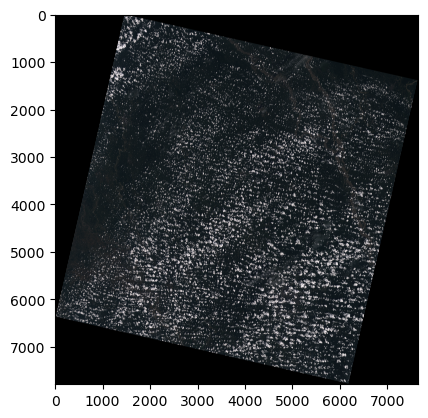

In [6]:
# Plot RGB
# Load RGB bands for visualisation
rgb = np.clip(satobj.load_bands(bands=RGB_BANDS[satname]), 0, 1)
plt.imshow(rgb)

In [7]:
# LOAD MODEL
model = utils.Model(satname=satname, namemodel=namemodel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━

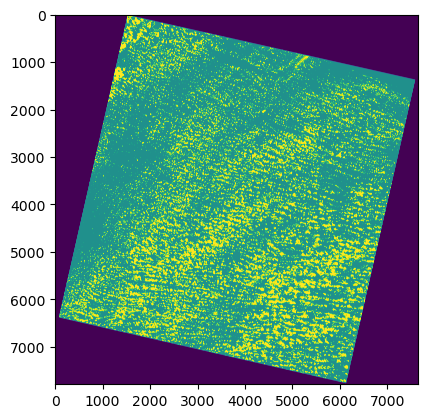

In [8]:
# PREDICTION
# Compute cloud mask (CM) from image with selected model
cloud_prob_bin = model.predict(satobj)

# Plot cloud mask
plt.imshow(cloud_prob_bin, vmin=0, vmax=2)

In [11]:
print(satobj.folder)

/Users/sid/Desktop/LC09_L1TP_144041_20240910_20240910_02_T1


In [9]:
# Store computed CM into .TIFF in product path
utils.save_cloud_mask(satobj, cloud_prob_bin, os.path.join(satobj.folder, "dluvclouds_" + namemodel + ".tif"))

### SENTINEL-2

In [ ]:
satname = "S2"
namemodel = "rgbiswir"

In [ ]:
# Read image
sentinelimage = "C:../../prods/S2A_MSIL1C_20160417T110652_N0201_R137_T29RPQ_20160417T111159.SAFE"
satobj = s2image.S2Image(sentinelimage)

In [ ]:
# Plot RGB
# Load RGB bands for visualisation
rgb = np.clip(satobj.load_bands(bands=RGB_BANDS[satname]), 0, 1)
plt.imshow(rgb)

In [ ]:
# LOAD MODEL
model = utils.Model(satname=satname, namemodel=namemodel)

In [ ]:
# PREDICTION
# Compute cloud mask (CM) from image with selected model
cloud_prob_bin = model.predict(satobj)

# Plot cloud mask
plt.imshow(cloud_prob_bin, vmin=0, vmax=2)

In [ ]:
# Store computed CM into .TIFF in product path
utils.save_cloud_mask(satobj, cloud_prob_bin, os.path.join(satobj.folder, "dluvclouds_" + namemodel + ".tif"))